Import necessary libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Loading the dataset

In [14]:
housing = fetch_california_housing()
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
target = pd.Series(data=housing.target, name='MedHouseValue')

In [15]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseValue, dtype: float64

In [18]:
print(data.shape)
print(target.shape)

(20640, 8)
(20640,)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [19]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

Custom Implementation

In [51]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    pred = np.dot(x,w) + b
    sqaured_error = (pred - y)**2
    cost = (1 / (2 * m)) * np.sum(sqaured_error)
    return cost

In [52]:
def compute_gradient(x, y, w,b):
    m = x.shape[0]
    pred = np.dot(x,w) + b
    dw = np.sum((pred-y)*x)/m
    db = np.sum((pred-y))/m
    return dw,db

In [55]:
def gradient_descent(x, y, w,b, lr, epochs):
    m = x.shape[0]
    loss = []
    for epoch in range(epochs):
        cost = compute_cost(x, y, w,b)
        gradient_w, gradient_b = compute_gradient(x, y, w,b)
        w -= lr * gradient_w
        b -= lr * gradient_b
        loss.append(cost)
    return w, b, loss

In [112]:
epochs = 50000
lr = 0.1
w = np.zeros(data.shape[1])
b = 0
w,b, loss = gradient_descent(x_train, y_train, w,b, lr, epochs)

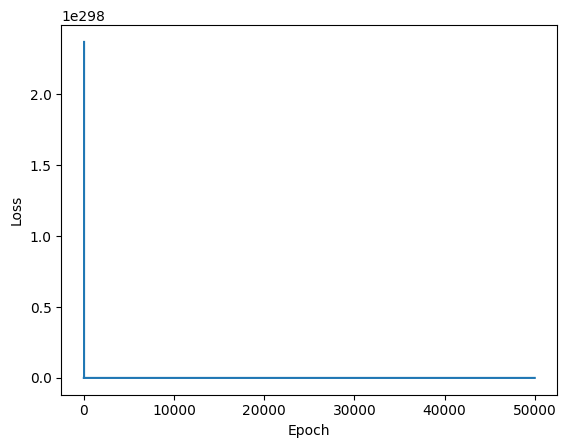

In [71]:
plt.plot(range(epochs), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [102]:
%time
y_train_pred = x_train * w + b
r2_score(y_train, np.sum(y_train_pred,axis=1))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


-3.211425854680181

In [108]:
y_test_pred = x_test * w + b
r2_score(y_test, np.sum(y_test_pred,axis=1))

-3.2226868057267666

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
%time
y_train_pred_sklearn = model.predict(x_train)
r2_score(y_train, y_train_pred_sklearn)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.11 µs


0.6125511913966952

In [79]:
y_test_pred_sklearn = model.predict(x_test)
r2_score(y_test, y_test_pred_sklearn)

0.5757877060324508